In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import os

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split

In [3]:
function_path = os.path.abspath('C:\\Users\\jared\\Documents\\Python')
sys.path.append(function_path)
from Functions import *

### Data Visualization & Analysis
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [4]:
#import data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# How many missing value?
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
num_var= f_num_var(df)
num_var

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

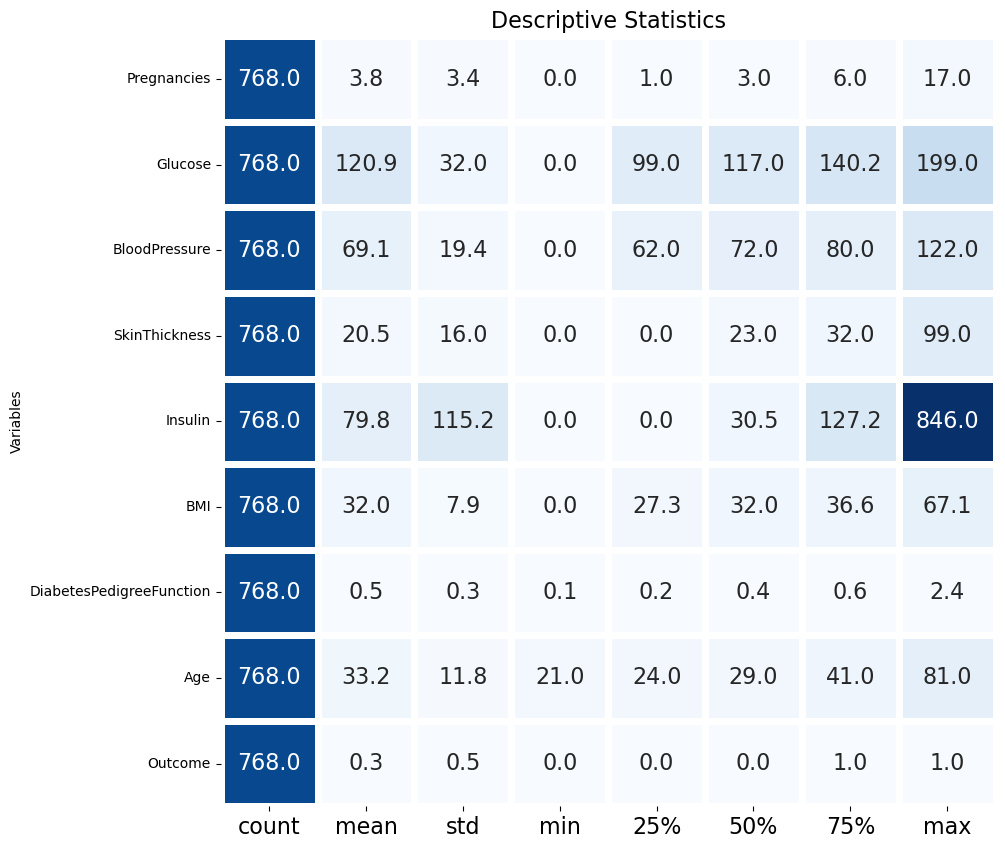

In [11]:
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(df.describe().T, annot= True, cmap= 'Blues', fmt= '.1f',
           ax=ax,linewidths = 5, cbar = False,
           annot_kws={'size': 16})

plt.xticks(size = 16)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

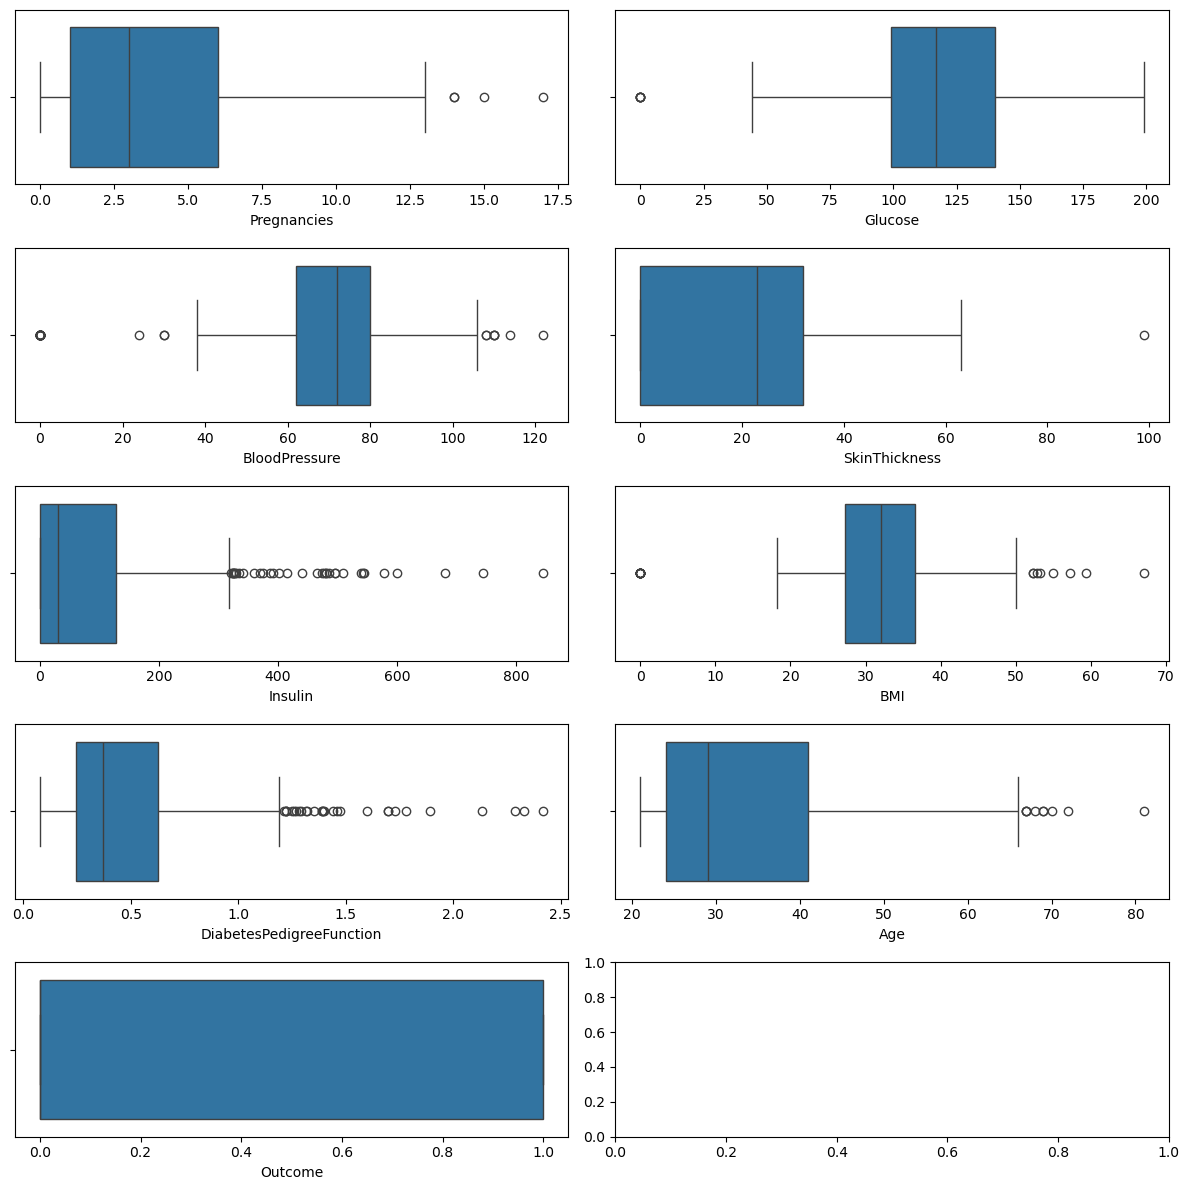

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
axes = axes.flatten()
for i in range(9):
    sns.boxplot(data= df.iloc[:,i], ax=axes[i], orient= 'h')

plt.tight_layout()
plt.show()

In [13]:
pd.concat([df['Outcome'].value_counts(), df['Outcome'].value_counts(normalize= True)], axis= 1)

,count,proportion
Outcome,,
0,500,0.651042
1,268,0.348958


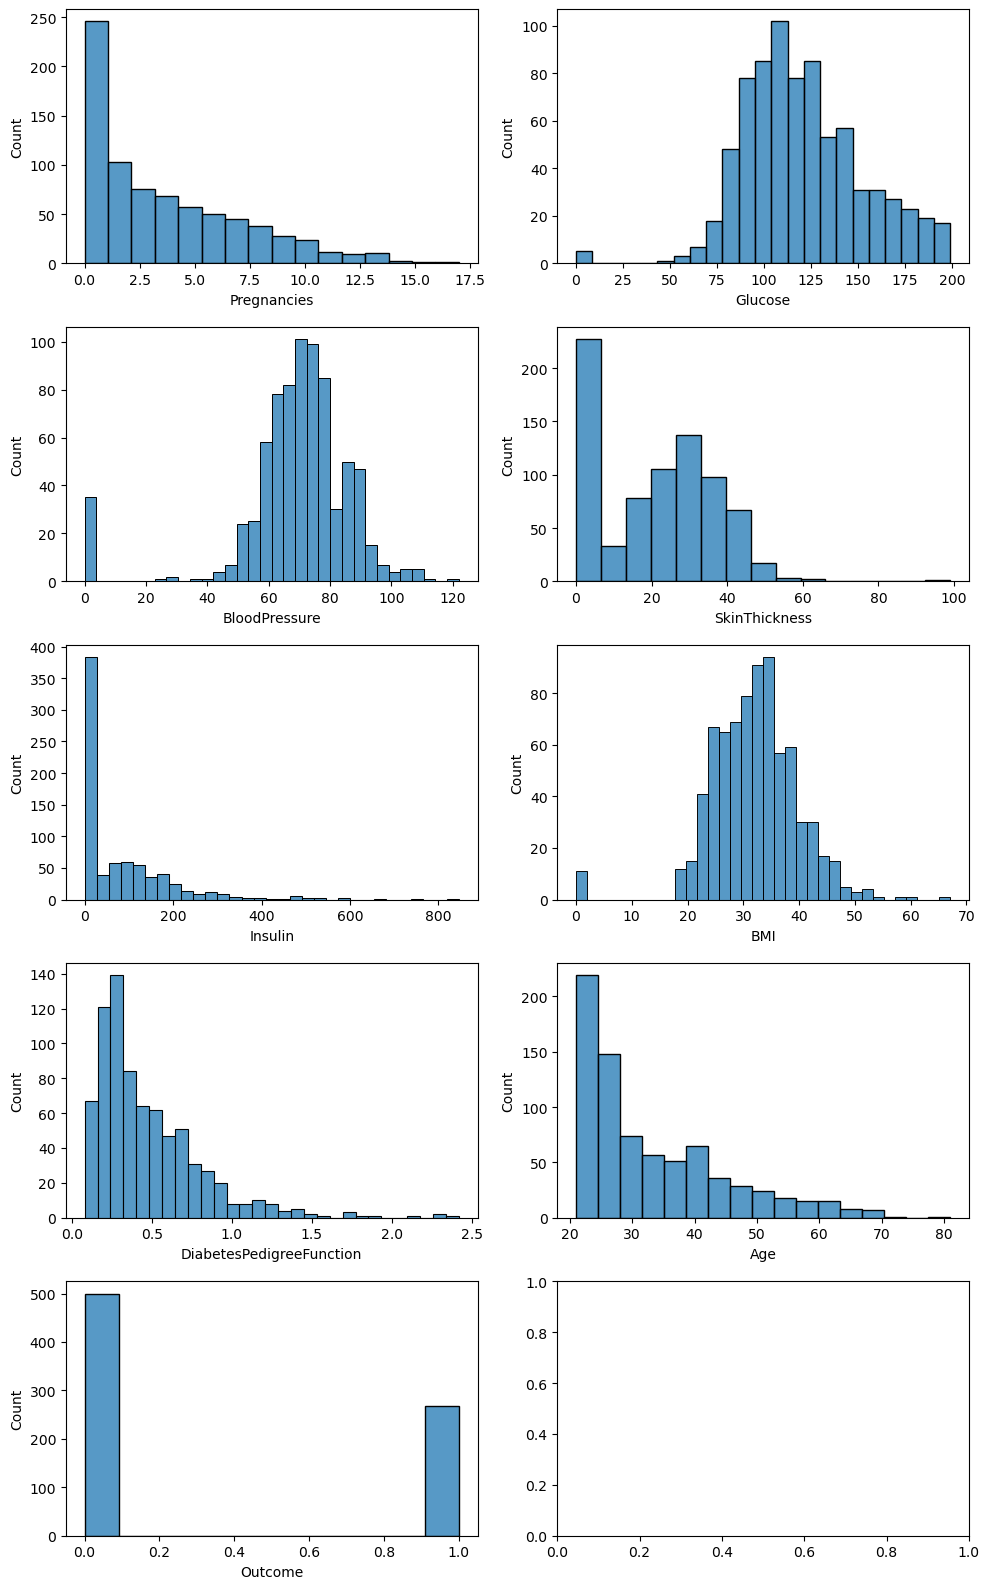

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(10, 16))
axes = axes.flatten()
for i in range(9):
    sns.histplot(data= df.iloc[:,i], ax=axes[i])

plt.tight_layout()
plt.show()

In [15]:
df1= df.copy()

In [16]:
for i in ['Glucose','Insulin','SkinThickness']:
    median_i= df1[df1[i]!= 0][i].median()
    df1[i]= df1[i].replace(0, median_i)
for i in ['BMI','BloodPressure']:
    mean_i= df1[df1[i]!=0][i].mean()
    df1[i]= df1[i].replace(0, mean_i)

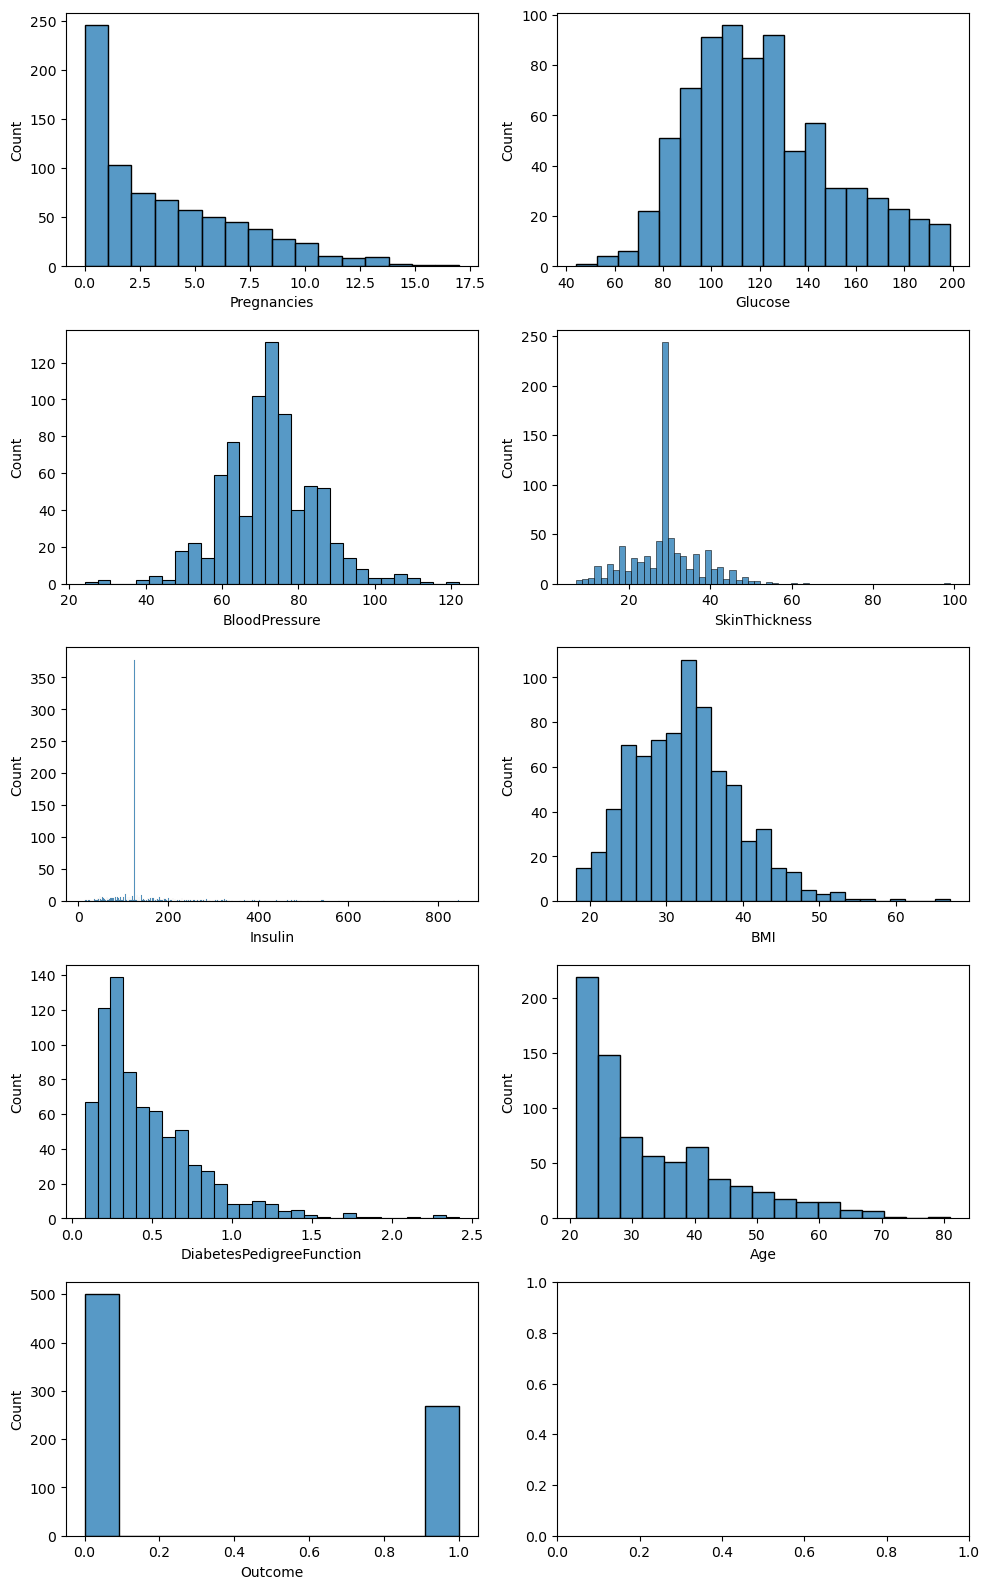

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(10, 16))
axes = axes.flatten()
for i in range(9):
    sns.histplot(data= df1.iloc[:,i], ax=axes[i])

plt.tight_layout()
plt.show()

In [18]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

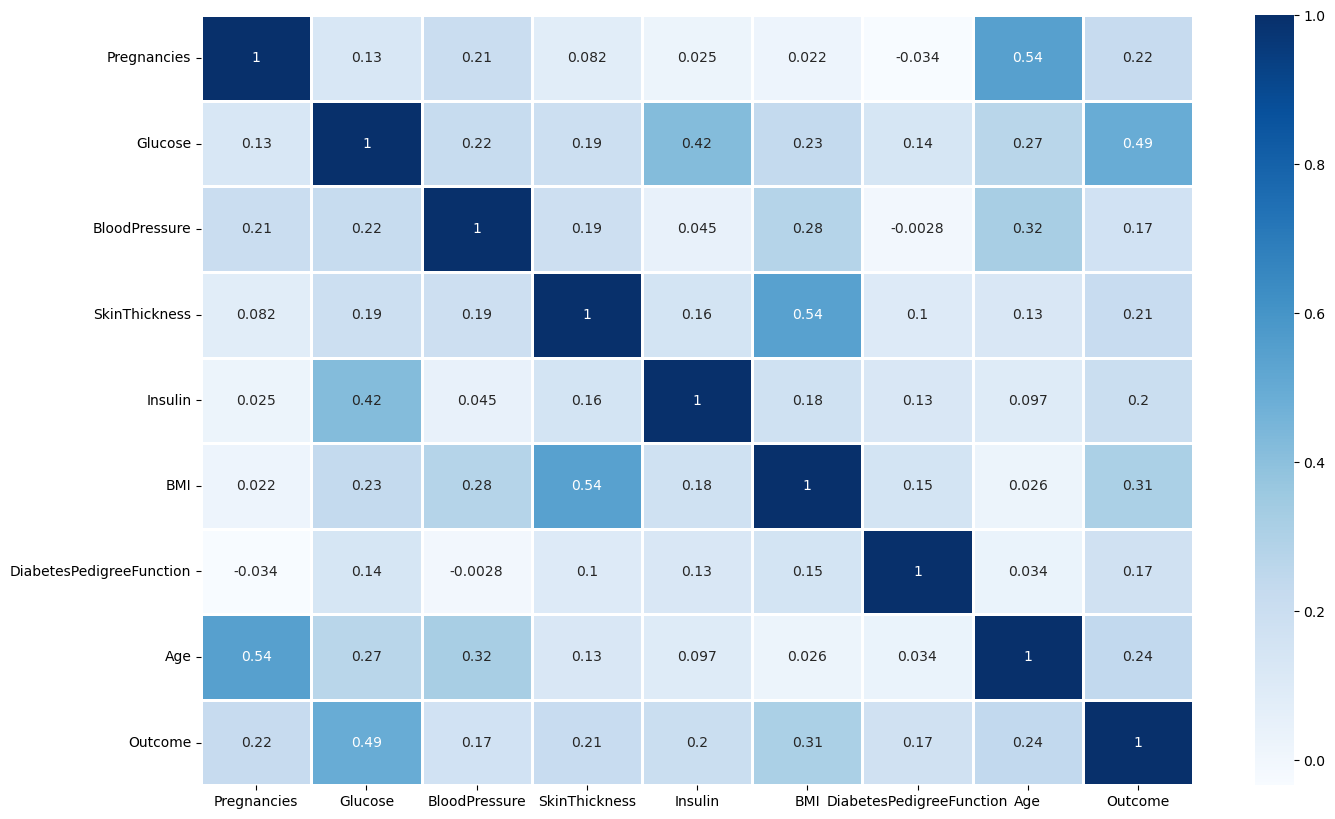

In [19]:
fig=plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(), annot=True, cmap='Blues', linecolor='white', linewidth=2 )

###  Best correlation for Glucose

In [20]:
df1.corr()['Outcome'].sort_values(ascending=False) #Correlation for get information

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

##  Creating & Training KNN Model

In [21]:
x, y= df1.drop(['Outcome'], axis= 1), df1['Outcome']

In [22]:
# Splitting the data
x_train, x_test, y_train, y_test  =  train_test_split(x,y, test_size = 0.3, random_state = 123)

### Modeling

In [24]:
k= 20
acc_l=[]
for i in range(1, k+1):
    knn= KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    acc_l.append(acc)
acc_df= pd.DataFrame({'k': list(range(1,k+1)), 'Accuracy': acc_l})
acc_df[acc_df['Accuracy']== acc_df['Accuracy'].max()]

,k,Accuracy
6,7,0.774892
10,11,0.774892
12,13,0.774892


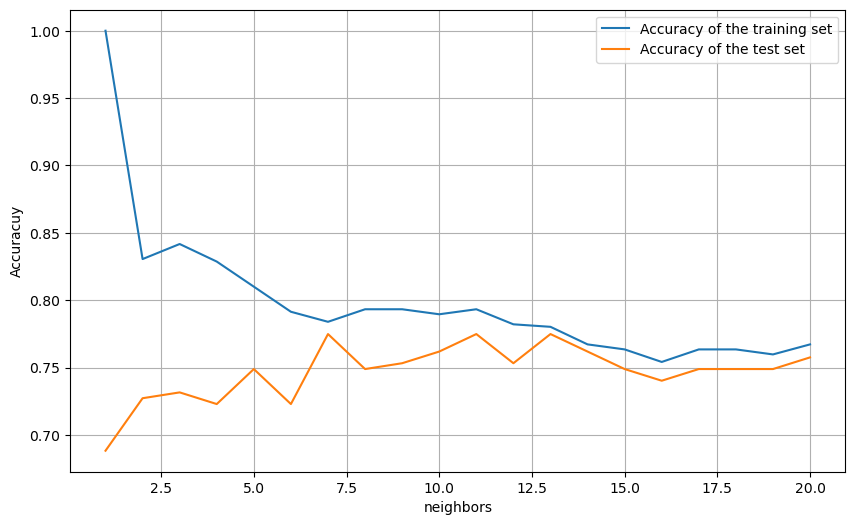

In [25]:
k= 20
train_acc=[]
test_acc=[]

for i in range(1, k+1):
    knn= KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, k+1), train_acc, label= 'Accuracy of the training set')
plt.plot(range(1, k+1), test_acc, label= 'Accuracy of the test set')
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()
plt.show()

In [27]:
param_grid = {'n_neighbors': range(1,21)}
knn = KNeighborsClassifier()

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scoring, refit='accuracy')

grid_search.fit(x_train, y_train)

best_knn = grid_search.best_estimator_
print("Best n_neighbors:", grid_search.best_params_)

print('-----Preliminary scores-----')
print('training score:', cross_val_score(best_knn, x_train, y_train, cv= 5).mean())
print('test score:', best_knn.score(x_test, y_test))

Best n_neighbors: {'n_neighbors': 7}
-----Preliminary scores-----
training score: 0.7412253374870197
test score: 0.7748917748917749


In [29]:
y_pred = best_knn.predict(x_test)

results = grid_search.cv_results_

best_index = grid_search.best_index_

mean_accuracy_cv = results['mean_test_accuracy'][best_index]
mean_precision_cv = results['mean_test_precision'][best_index]
mean_recall_cv = results['mean_test_recall'][best_index]
mean_f1_cv = results['mean_test_f1'][best_index]

print('-----Training results-----')
print(f"Mean accuracy (CV): {mean_accuracy_cv * 100:.4f}%")
print(f"Mean precision (CV): {mean_precision_cv * 100:.4f}%")
print(f"Mean recall (CV): {mean_recall_cv * 100:.4f}%")
print(f"Mean F1 score (CV): {mean_f1_cv * 100:.4f}%")

-----Training results-----
Mean accuracy (CV): 74.1225%
Mean precision (CV): 62.9258%
Mean recall (CV): 55.0000%
Mean F1 score (CV): 58.6371%


In [30]:
def clasification_metrics(y_real, y_pred, average= 'binary'):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average=average)
    recall = recall_score(y_real, y_pred, average=average)
    f1 = f1_score(y_real, y_pred, average=average)

    print(f"Accuracy: {accuracy * 100:.4f}%")
    print(f"Precision: {precision * 100:.4f}%")
    print(f"Recall: {recall * 100:.4f}%")
    print(f"F1 Score: {f1 * 100:.4f}%")

In [31]:
print('-----Test results-----')
clasification_metrics(y_test, y_pred)

-----Test results-----
Accuracy: 77.4892%
Precision: 73.6842%
Recall: 63.6364%
F1 Score: 68.2927%


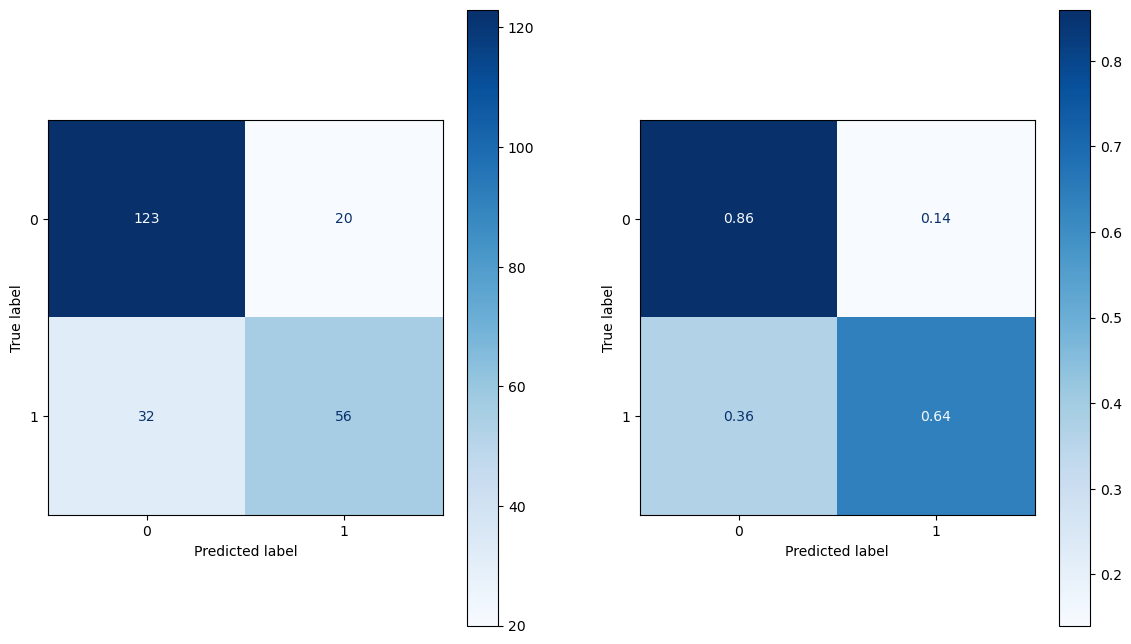

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[1], normalize= 'true')

plt.show()

In [33]:
y_probs = best_knn.predict_proba(x_test)[:, 1]
y_probs[:5]

array([0.85714286, 0.28571429, 0.42857143, 0.        , 0.        ])

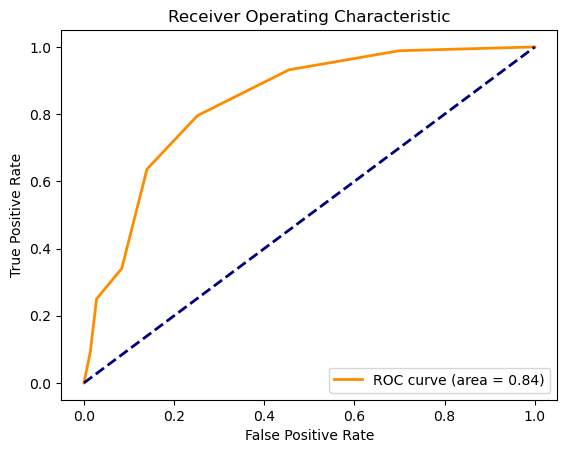

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##  Creating & Training Logestic Regression Model

In [35]:
logreg = LogisticRegression(solver = "liblinear", max_iter= 10000, random_state=123)

In [36]:
logreg.fit(x_train , y_train)
y_pred = logreg.predict(x_test)

In [39]:
print('-----Preliminary scores-----')
print('training score:', cross_val_score(logreg, x_train, y_train, cv= 5).mean())
print('Test score:', logreg.score(x_test, y_test))

-----Preliminary scores-----
training score: 0.756178608515057
Test score: 0.7835497835497836


In [40]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

results = cross_validate(logreg, x_train, y_train, cv=5, scoring=scoring)

print('-----Training results-----')
print(f"Mean accuracy: {results['test_accuracy'].mean() * 100:.4f}%")
print(f"Mean precision: {results['test_precision'].mean() * 100:.4f}%")
print(f"Mean recall: {results['test_recall'].mean() * 100:.4f}%")
print(f"Mean f1: {results['test_f1'].mean() * 100:.4f}%")

-----Training results-----
Mean accuracy: 75.6179%
Mean precision: 72.4953%
Mean recall: 45.5556%
Mean f1: 55.7615%


In [41]:
print('-----Test results-----')
clasification_metrics(y_test, y_pred)

-----Test results-----
Accuracy: 78.3550%
Precision: 78.7879%
Recall: 59.0909%
F1 Score: 67.5325%


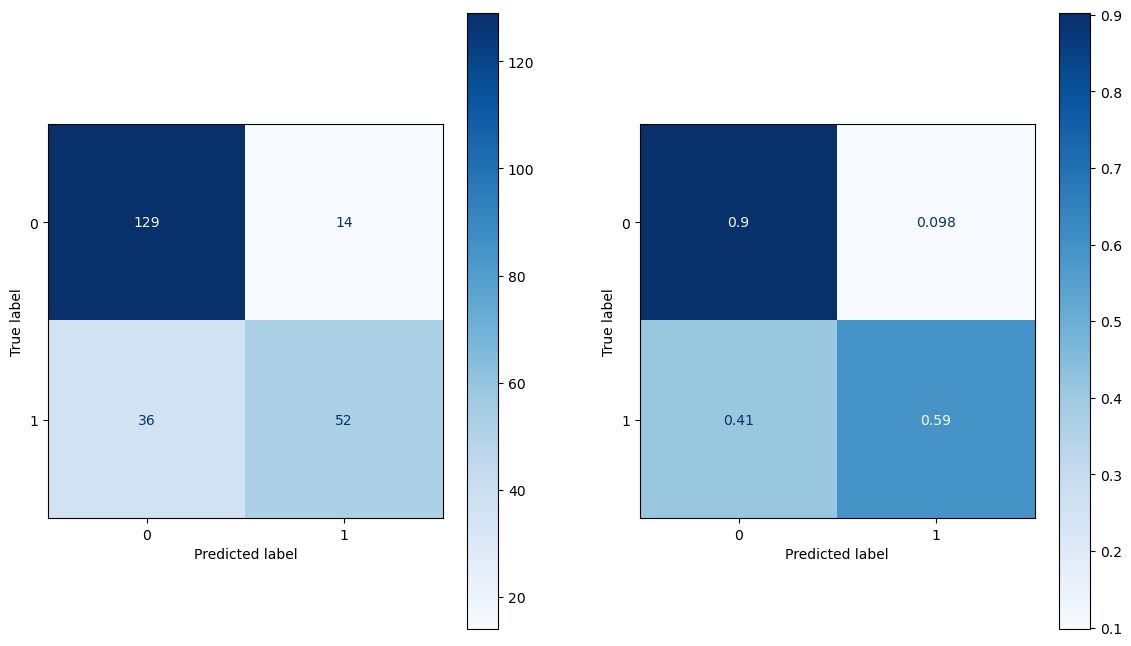

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[1], normalize= 'true')

plt.show()

In [43]:
y_probs = logreg.predict_proba(x_test)[:, 1]

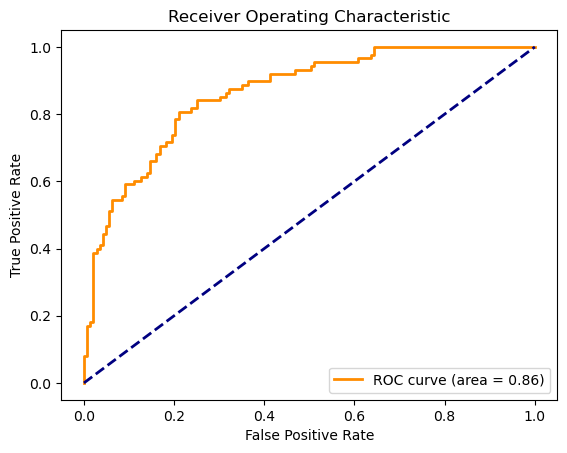

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Creating & Training SVM Model

In [47]:
svm = SVC()
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 5, 10, 15, 20, 25]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy')
grid_search.fit(x_train, y_train)

best_svm= grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

print('training score:', cross_val_score(best_svm, x_train, y_train, cv= 5).mean())
print('test score:', best_svm.score(x_test, y_test))

Best parameters: {'C': 20, 'kernel': 'linear'}
training score: 0.767324333679474
test score: 0.7922077922077922


In [48]:
# 7. Predecir con el conjunto de prueba usando el mejor modelo
y_pred = best_svm.predict(x_test)

# Resultados del proceso de GridSearchCV (de la validación cruzada)
results = grid_search.cv_results_

# Obtener las métricas para la mejor combinación de hiperparámetros
best_index = grid_search.best_index_

mean_accuracy_cv = results['mean_test_accuracy'][best_index]
mean_precision_cv = results['mean_test_precision'][best_index]
mean_recall_cv = results['mean_test_recall'][best_index]
mean_f1_cv = results['mean_test_f1'][best_index]

print('-----Training results-----')
print(f"Mean accuracy (CV): {mean_accuracy_cv * 100:.4f}%")
print(f"Mean precision (CV): {mean_precision_cv * 100:.4f}%")
print(f"Mean recall (CV): {mean_recall_cv * 100:.4f}%")
print(f"Mean F1 score (CV): {mean_f1_cv * 100:.4f}%")

-----Training results-----
Mean accuracy (CV): 76.7324%
Mean precision (CV): 73.2960%
Mean recall (CV): 50.0000%
Mean F1 score (CV): 59.2049%


In [49]:
print('-----Test results-----')
clasification_metrics(y_test, y_pred)

-----Test results-----
Accuracy: 79.2208%
Precision: 78.5714%
Recall: 62.5000%
F1 Score: 69.6203%


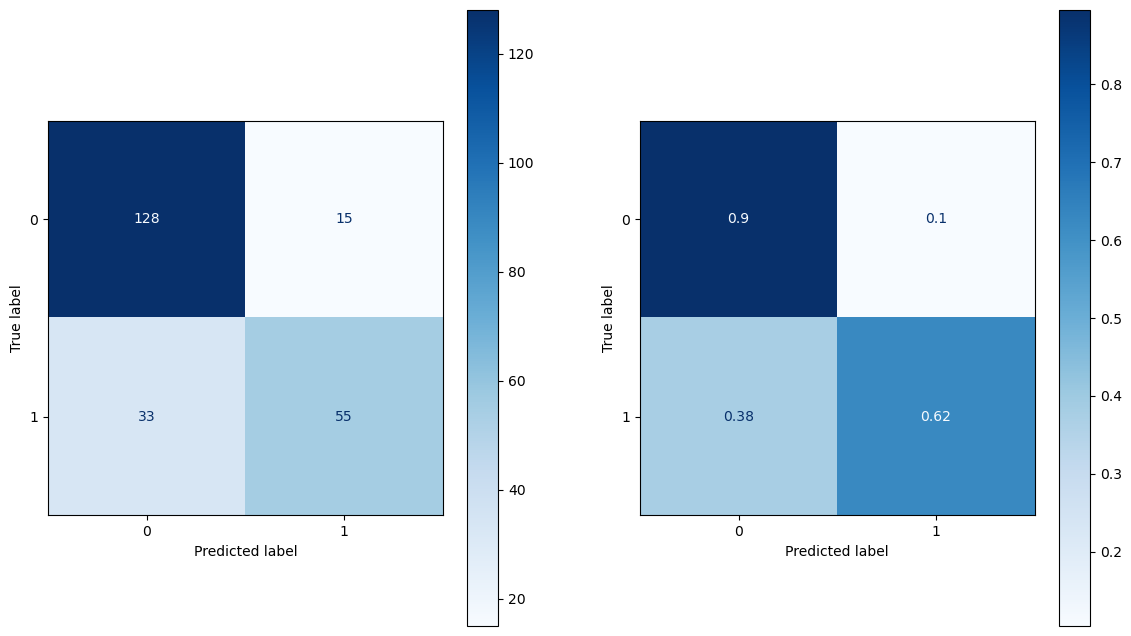

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'Blues', ax= ax[1], normalize= 'true')

plt.show()

In [51]:
y_scores = best_svm.decision_function(x_test)

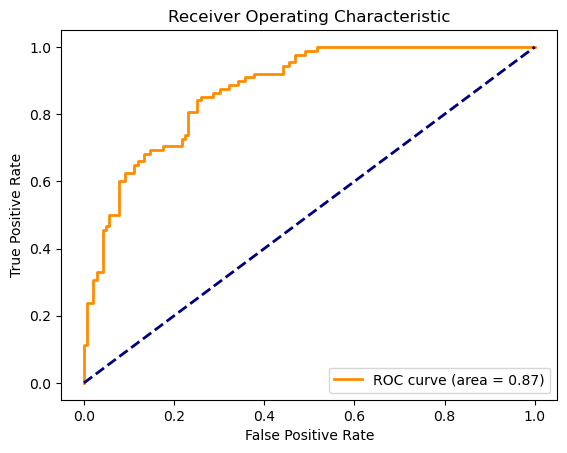

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()